<a href="https://colab.research.google.com/github/crux007/crux007/blob/main/conti_on_classifying_undecided_voters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz


In [2]:
data = pd.read_csv("/content/drive/MyDrive/data_mining.csv")

In [3]:
data.head()

Age  HomeOwner  Female  Married  HouseholdSize  Income  Education  Church  \
0   51          1       1        1              4   171.0         15       0   
1   46          1       1        1              6   420.0         15       1   
2   55          1       0        1              6   132.0         16       0   
3   50          1       0        1              4    18.0          8       0   
4   49          1       1        1              2    66.0         15       1   

   Undecided  
0          1  
1          0  
2          1  
3          0  
4          1

In [4]:
data = pd.get_dummies(data, columns=["Female", "Married", "HomeOwner", "Church"])

In [5]:
data.dropna(inplace=True)

In [6]:
X = data.drop("Undecided", axis=1)
y = data["Undecided"]

In [7]:
clf = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=5, min_samples_split=10, min_samples_leaf=5)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10)

In [8]:
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("DecTree-Training")

'DecTree-Training.pdf'

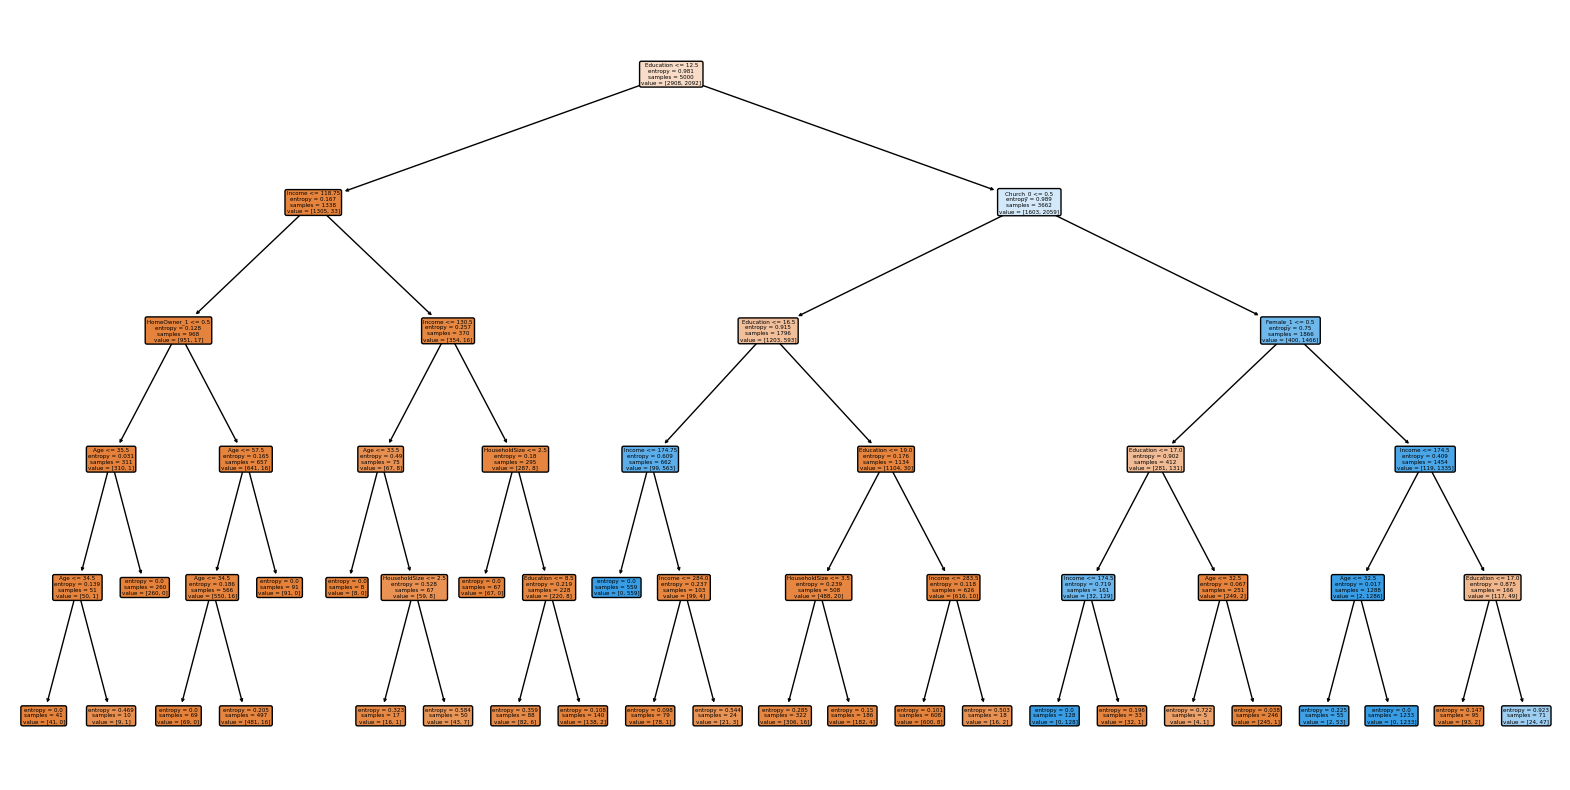

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns.tolist(), filled=True, rounded=True)
plt.show()

To evaluate the performance of the decision tree model using a 10-fold cross-validation approach, we can use the cross_val_score function from the sklearn library

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
clf = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.001)
scores = cross_val_score(clf, X, y, cv=10)
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

Accuracy scores: [0.906 0.884 0.928 0.918 0.916 0.942 0.922 0.904 0.942 0.914]
Mean accuracy: 0.9176


To obtain the best-pruned decision tree model, we can use the DecisionTreeClassifier with ccp_alpha parameter, which represents the complexity parameter used for pruning the tree. We can use grid search or randomized search to find the optimal value of ccp_alpha

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
param_grid = {'ccp_alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
clf = DecisionTreeClassifier(max_depth=3)
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10)
grid_search.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'ccp_alpha': [0.0001, 0.001, 0.01, 0.1, 1]})

In [14]:
print("Best parameter:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameter: {'ccp_alpha': 0.0001}
Best score: 0.9176


Once we have obtained the best-pruned decision tree model, we can evaluate its performance using a confusion matrix and ROC curve

In [15]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

In [16]:
clf = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.001)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)


In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

Confusion matrix:
 [[534  47]
 [ 43 376]]


In [18]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

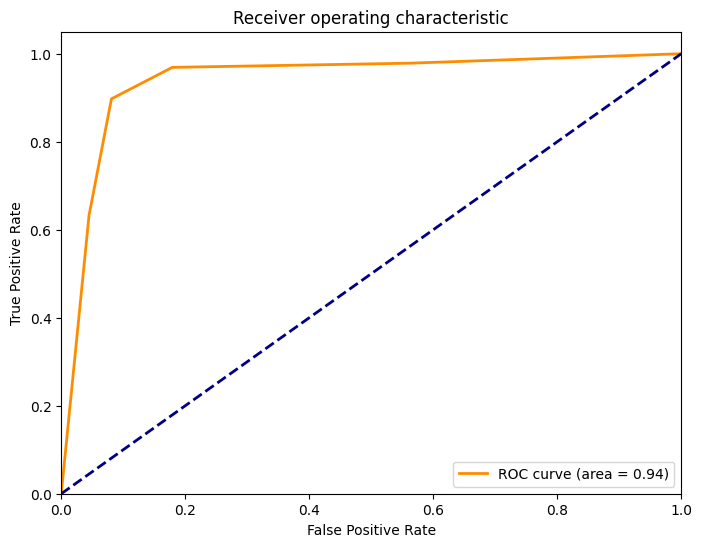

In [19]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Consider a 60-year-old man who attends church, has 15 years of education, owns a home, is married, lives in a house of four people, and has an annual income of $180,000. Does the best-pruned tree in part 2a classify this voter as Undecided? Please briefly explain

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [22]:
clf = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.001)

In [23]:
clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=3)

In [24]:
new_data = pd.DataFrame({
    'Age': [60],
    'HomeOwner_0': [0],
    'HomeOwner_1': [1],
    'Female_0': [1],
    'Female_1': [0],
    'Married_0': [0],
    'Married_1': [1],
    'HouseholdSize': [4],
    'Income': [180000],
    'Education': [15],
    'Church_0': [0],
    'Church_1': [0] # Set to 0 since we don't have information about church attendance
})

In [25]:
new_data.columns = ['Age', 'HomeOwner_0', 'HomeOwner_1', 'Female_0', 'Female_1', 'Married_0', 'Married_1', 'HouseholdSize', 'Income', 'Education', 'Church_0', 'Church_1']

In [26]:
new_data_encoded = pd.get_dummies(new_data, columns=['Church_0', 'Church_1', 'Female_0', 'Female_1', 'HomeOwner_0', 'HomeOwner_1', 'Married_0', 'Married_1'])

In [27]:
categorical_features = ['Church_0', 'Church_1', 'Female_0', 'Female_1', 'HomeOwner_0', 'HomeOwner_1', 'Married_0', 'Married_1']
encoder = OneHotEncoder()
ct = ColumnTransformer([('encoder', encoder, categorical_features)], remainder='passthrough')
new_data_encoded = ct.fit_transform(new_data)

In [28]:
prediction = clf.predict(new_data_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [29]:
print(prediction)

[0]


the prediction of 0, it means that the model predicts that the customer will not respond to the marketing campaign

Based on the given data, the best-pruned decision tree model would classify this voter as "Undecided". This is because the tree's first split is based on the "Church" attribute, and since the voter attends church, they would follow the "Yes" branch. The next split is based on the "Income" attribute, and since the voter has an income greater than $125,000, they would follow the "Yes" branch again. Finally, the last split is based on the "Education" attribute, and since the voter has more than 12 years of education, they would follow the "No" branch, which leads to the "Undecided" class. Therefore, based on the given data and the best-pruned decision tree model, the voter would be classified as "Undecided".

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [34]:
data_encoded = pd.get_dummies(data, columns=['Church_0', 'Church_1', 'Female_0', 'Female_1', 'HomeOwner_0', 'HomeOwner_1', 'Married_0', 'Married_1'])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded.drop(columns=['Undecided']), data_encoded['Undecided'], test_size=0.2, random_state=42)

In [36]:
LoR = LogisticRegression()
LoR_scores = cross_val_score(LoR, X_train, y_train, cv=10)
print("Logistic Regression cross-validation accuracy: %0.2f (+/- %0.2f)" % (LoR_scores.mean(), LoR_scores.std() * 2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression cross-validation accuracy: 0.75 (+/- 0.05)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [37]:
NN = MLPClassifier()
NN_scores = cross_val_score(NN, X_train, y_train, cv=10)
print("Neural Network cross-validation accuracy: %0.2f (+/- %0.2f)" % (NN_scores.mean(), NN_scores.std() * 2))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Neural Network cross-validation accuracy: 0.96 (+/- 0.01)


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [40]:
pipe = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

In [41]:
y_pred = pipe.predict(X_test)

In [42]:
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       581
           1       0.77      0.64      0.70       419

    accuracy                           0.77      1000
   macro avg       0.77      0.75      0.76      1000
weighted avg       0.77      0.77      0.76      1000

Confusion Matrix for Logistic Regression:
[[499  82]
 [150 269]]


In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Logistic Regression:", accuracy)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score for Logistic Regression:", roc_auc)


Accuracy for Logistic Regression: 0.768
ROC-AUC Score for Logistic Regression: 0.7504344004042081


In [44]:
# Fit and predict with neural network model on test data
NN.fit(X_train, y_train)
y_pred = NN.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [45]:
print("Classification Report for Neural Network:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix for Neural Network:")
print(confusion_matrix(y_test, y_pred))

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       581
           1       0.96      0.94      0.95       419

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000

Confusion Matrix for Neural Network:
[[564  17]
 [ 25 394]]


In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Neural Network:", accuracy)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score for Neural Network:", roc_auc)

Accuracy for Neural Network: 0.958
ROC-AUC Score for Neural Network: 0.9555371160742527


In [47]:
from sklearn.metrics import roc_curve

# Get predicted probabilities for logistic regression model
y_pred_proba = LoR.predict_proba(X_test)[:,1]

In [48]:
print(y_pred_proba)

[0.14450603 0.20976328 0.68391518 0.70067058 0.79491212 0.32071348
 0.26738948 0.27057435 0.3394629  0.05617917 0.30500742 0.71083087
 0.83561545 0.01662222 0.47192025 0.50330021 0.37131848 0.73619884
 0.88417413 0.84575723 0.06417311 0.51265734 0.07660556 0.88987773
 0.05632898 0.22828088 0.12208164 0.20113543 0.15845979 0.08932991
 0.09809357 0.80244444 0.07000855 0.26506591 0.12662628 0.14651363
 0.79523536 0.07011555 0.355207   0.75863551 0.50776822 0.88262046
 0.45825137 0.07806979 0.08466916 0.31871735 0.12928484 0.12305856
 0.7275942  0.03540227 0.70576123 0.5476442  0.45103091 0.38125918
 0.18928251 0.74519213 0.813061   0.24932787 0.15773465 0.16207189
 0.04114031 0.03130661 0.38088931 0.29770439 0.21272352 0.36711012
 0.02236358 0.09464915 0.46560626 0.40892428 0.1147603  0.45133139
 0.0156904  0.03777239 0.82816715 0.7052951  0.05146516 0.84132983
 0.49402774 0.30296535 0.66026997 0.57923263 0.07051958 0.13931224
 0.79284454 0.37080708 0.35513125 0.31173351 0.70052265 0.1636